# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**AI-generated Notebook**  
*This notebook was automatically generated by an AI and has not been fully verified by a human expert. Please use caution interpreting the code and results, and independently confirm findings where appropriate.*

## Overview

This notebook explores Dandiset [001195, version 0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733), containing data supporting the publication:
> Keyes, Laurel; Lee, Christopher R.; Wichmann, Romy; Matthews, Gillian A.; Tye, Kay M.  (2025) Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State (Version 0.250408.1733) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001195/0.250408.1733

### Dataset content
- In vivo calcium imaging
- Behavioral videos
- Ex vivo patch-clamp electrophysiology recordings (CurrentClamp and VoltageClamp)

Data modalities include episodic stimulation protocols, step currents, and holding/response paradigms on mouse brain slices (intracellular recordings).

**This notebook provides guidance on:**  
- Accessing DANDI datasets and metadata  
- Loading and inspecting NWB files  
- Understanding file structure and available data  
- Visualizing electrophysiological sweeps (stimulus/response)  
- Outlining possible future analysis

## Required Packages
The following packages must be installed to run this notebook:
- dandi
- pynwb
- remfile
- h5py
- numpy
- matplotlib

(You may need to install these in your Python environment.)

In [1]:
# Import necessary packages
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt

## Get Dandiset Metadata and Preview Assets

In [2]:
# Connect to DANDI archive and show basic info
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', '')[:350]}...")

assets = dandiset.get_assets()
print("\nFirst 5 assets in the Dandiset:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier}, size={asset.size / 1e6:.1f} MB)")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
Dandiset description: Supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabeth M. Wasserlein, Matilde Borio, Raymundo L. Miranda, Laurel R. Keyes, Gates P. Schneider, Caroline Jia, Andrea Tran, Faith Aloboudi, May G. Chan, Enzo...

First 5 assets in the Dandiset:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7, size=37.7 MB)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc, size=39.7 MB)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c, size=13.6 MB)
- sub-23/sub-23_ses-20150324T154615_

## NWB File Selection

For illustration, we will examine:  
**`sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`**  
ID: `a243dde4-c270-42a9-8550-025f5ffcd5a7`

File URL for direct streaming:
```
https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/
```

[Open in Neurosift (NWB Viewer)](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft)

## Loading the NWB File
Below, we use PyNWB and remfile to stream the NWB file directly from the archive, following official usage for remote DANDI files.

In [3]:
# Load NWB file directly from the DANDI asset URL using remfile + h5py + PyNWB
url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("File loaded.")

File loaded.


## NWB File Metadata Summary
We'll summarize some experimental context, subject information, and provide a structured overview of the file contents for orientation.

In [4]:
# Print subject and session info
subject = getattr(nwb, "subject", None)
print("Session description:", getattr(nwb, "session_description", ''))
if subject is not None:
    print("Subject info:")
    for attr in ["subject_id", "sex", "species", "age", "genotype", "strain", "date_of_birth", "description"]:
        if hasattr(subject, attr):
            print(f"  {attr}: {getattr(subject, attr)}")

print("Lab:", getattr(nwb, "lab", ''))
print("Institution:", getattr(nwb, "institution", ''))

# Print electrode info
print("\nIntracellular electrodes:")
for key, elec in nwb.icephys_electrodes.items():
    desc = getattr(elec, "description", "n/a")
    device = getattr(elec, "device", None)
    dev_name = getattr(device, "name", "n/a") if device else "n/a"
    print(f"  - {key}: {desc}, device: {dev_name}")

# Print available acquisition and stimulus keys/types, with sample shapes
print("\nAcquisition entries:")
for key, acq in islice(nwb.acquisition.items(), 10):
    t = type(acq).__name__
    shape = getattr(acq, 'data', None)
    shape_str = str(shape.shape) if hasattr(shape, 'shape') else str(type(shape))
    print(f"  - {key}: {t}, data shape: {shape_str}")

print("\nStimulus entries:")
for key, stim in islice(nwb.stimulus.items(), 10):
    t = type(stim).__name__
    shape = getattr(stim, 'data', None)
    shape_str = str(shape.shape) if hasattr(shape, 'shape') else str(type(shape))
    print(f"  - {key}: {t}, data shape: {shape_str}")

Session description: episodic stimulation
Subject info:
  subject_id: 23
  sex: F
  species: Mus musculus
  age: P302D
  genotype: heterozygote
  strain: DAT::Cre
  date_of_birth: 2014-05-26 00:00:00-07:00
  description: AAV5-DIO-ChR2-eYFP into DRN
Lab: Kay Tye Lab
Institution: Massachusetts Institute of Technology

Intracellular electrodes:
  - electrode-0: no description, device: DeviceIcephys
  - electrode-1: no description, device: DeviceIcephys

Acquisition entries:
  - current_clamp-response-01-ch-0: CurrentClampSeries, data shape: (3000,)
  - current_clamp-response-01-ch-1: CurrentClampSeries, data shape: (3000,)
  - current_clamp-response-02-ch-0: CurrentClampSeries, data shape: (3000,)
  - current_clamp-response-02-ch-1: CurrentClampSeries, data shape: (3000,)
  - current_clamp-response-03-ch-0: CurrentClampSeries, data shape: (3000,)
  - current_clamp-response-03-ch-1: CurrentClampSeries, data shape: (3000,)
  - current_clamp-response-04-ch-0: CurrentClampSeries, data shape: 

### NWB Structure Overview

```text
Intracellular electrodes: electrode-0, electrode-1
Acquisition entries (CurrentClamp, VoltageClamp, Images):
  - current_clamp-response-XX-ch-Y (CurrentClampSeries) : Many sweeps, shape varies (e.g., (3000,) or (200000,))
  - voltage_clamp-response-XX-ch-Y (VoltageClampSeries) : Many sweeps, shape ~ (50000,)
  - histology_images (Images)
Stimulus entries:
  - stimulus-XX-ch-Y (CurrentClampStimulusSeries or VoltageClampStimulusSeries) : Matching keys to responses
```

See [Neurosift NWB viewer for this file](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft) for interactive exploration.

## Example: Visualizing a Current Clamp Response and its Stimulus

Let's examine an example current clamp sweep (`current_clamp-response-01-ch-0`).  
The plot below shows both the voltage response and injected current.

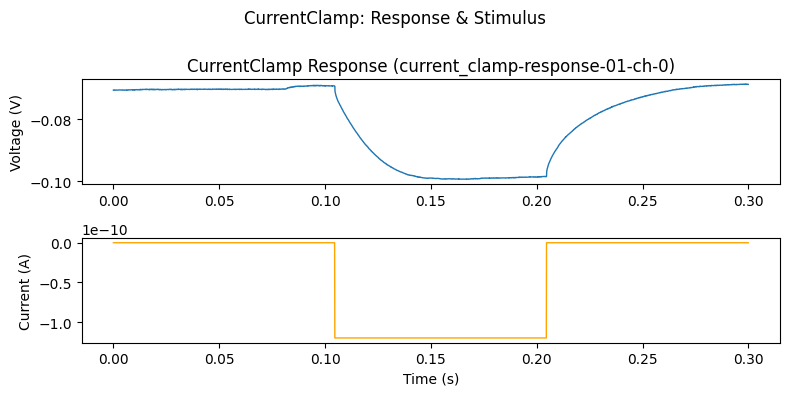

In [5]:
# -- Current Clamp: plot response & stimulus for sweep 01-ch-0 --
cc_resp = nwb.acquisition['current_clamp-response-01-ch-0']
cc_stim = nwb.stimulus['stimulus-01-ch-0']
fs_cc = cc_resp.rate
t_cc = np.arange(cc_resp.data.shape[0]) / fs_cc

plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(t_cc, cc_resp.data[:] * cc_resp.conversion, lw=1)
plt.ylabel('Voltage (V)')
plt.title('CurrentClamp Response (current_clamp-response-01-ch-0)')
plt.subplot(2, 1, 2)
plt.plot(t_cc, cc_stim.data[:] * cc_stim.conversion, color='orange', lw=1)
plt.ylabel('Current (A)')
plt.xlabel('Time (s)')
plt.suptitle('CurrentClamp: Response & Stimulus')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Interpretation:**  
This is a classic step current paradigm; the injected current trace (orange) shows a negative step followed by a return to baseline, and the voltage deflects accordingly with expected onset, offset, and recovery.  
The traces are plausible and typical for patch-clamp experiments.

## Example: Visualizing a Voltage Clamp Response and its Command Voltage

Let's look at a basic voltage clamp experiment:  
`voltage_clamp-response-22-ch-0` (response) and `stimulus-22-ch-0` (command voltage).

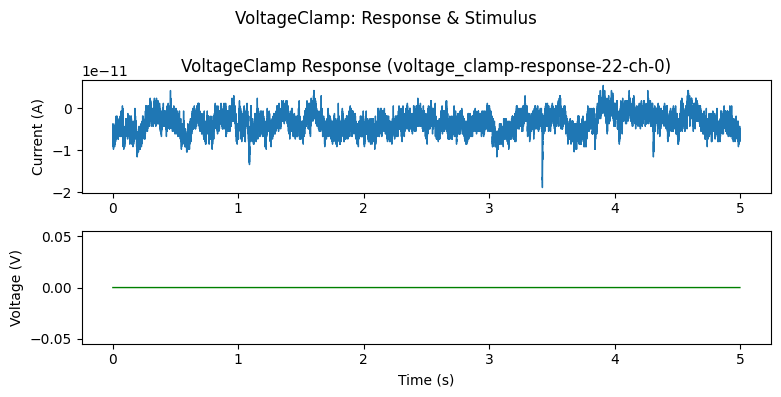

In [6]:
# -- Voltage Clamp: plot holding current & command voltage for sweep 22-ch-0 --
vc_resp = nwb.acquisition['voltage_clamp-response-22-ch-0']
vc_stim = nwb.stimulus['stimulus-22-ch-0']
fs_vc = vc_resp.rate
t_vc = np.arange(vc_resp.data.shape[0]) / fs_vc

plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(t_vc, vc_resp.data[:] * vc_resp.conversion, lw=1)
plt.ylabel('Current (A)')
plt.title('VoltageClamp Response (voltage_clamp-response-22-ch-0)')
plt.subplot(2, 1, 2)
plt.plot(t_vc, vc_stim.data[:] * vc_stim.conversion, color='green', lw=1)
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.suptitle('VoltageClamp: Response & Stimulus')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Interpretation:**  
Here the holding voltage is constant (flat command trace at 0 V), and the holding current trace shows noise at the 10^-11 A level, with no stimulus events. These are plausible and typical of baseline voltage clamp holding periods.

## Further Exploration & Next Steps

- To access additional sweeps, simply change the acquisition and stimulus keys to e.g., `'current_clamp-response-02-ch-0'`, etc.
- The Dandiset contains many more cells and protocols — you can adapt the code above to iterate or aggregate across protocols, compare responses, or analyze image data.
- For protocols with larger/smaller shapes (as seen above), adjust plotting accordingly.
- Interactive NWB tools such as [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft) provide visualization/exploration without coding.

**Possible future analyses:**
- Quantify physiological properties (e.g., input resistance, holding current stability)
- Analyze spike properties or create custom visualizations for stimulus-response relationships
- Extend to additional file(s) or modalities in the Dandiset

## Summary
- This notebook demonstrated how to load, inspect, and visualize intracellular electrophysiology sweeps from a DANDI NWB dataset.
- With provided code and references, you can adapt these methods to systematically analyze, explore, and visualize a wide range of experiments within the Dandiset.